## **Bining | Binarization**

In [26]:
# import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

In [27]:
df = pd.read_csv('./dataset/train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [28]:
# impute age columns by simple imputer 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
df['Age'] = imputer.fit_transform(df[['Age']])

In [29]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [30]:
X = df.iloc[:,1:]
y = df.iloc[:, 0]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


In [33]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6480446927374302

In [34]:
cross_val_score(clf, X, y, scoring='accuracy', cv=5).mean()

0.641993597388739

In [35]:
kbin_age = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

In [36]:
trf = ColumnTransformer([
    ('first',kbin_age, [0]),
    ('second', kbin_fare, [1])
], remainder='passthrough')

In [37]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [38]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42      , 21.        , 28.        , 29.69911765, 38.        ,
              80.        ])                                                   ],
      dtype=object)

In [39]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.     ,   7.88916,  10.5    ,  21.045  ,  39.6875 , 512.3292 ])],
      dtype=object)

In [40]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [41]:
output['age_labels'] = pd.cut(x=X_train['Age'], bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'], bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [42]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
500,17.0,0.0,8.6625,1.0,"(0.42, 21.0]","(7.889, 10.5]"
59,11.0,0.0,46.9000,4.0,"(0.42, 21.0]","(39.688, 512.329]"
125,12.0,0.0,11.2417,2.0,"(0.42, 21.0]","(10.5, 21.045]"
445,4.0,0.0,81.8583,4.0,"(0.42, 21.0]","(39.688, 512.329]"
775,18.0,0.0,7.7500,0.0,"(0.42, 21.0]","(0.0, 7.889]"


In [47]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2 = clf.predict(X_test_trf)

In [48]:
accuracy_score(y_test, y_pred2)

0.6983240223463687

In [49]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy'))

0.6554806491885143

In [56]:
def discretize(bins, strategy):
    kbins_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbins_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)

    trf = ColumnTransformer([
        ('first', kbin_age, [0]),
        ('second', kbin_fare, [1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[:,0], color='red')
    plt.title('After')

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[:,1], color='red')
    plt.title('Fare')

    plt.show()



0.6599500624219725


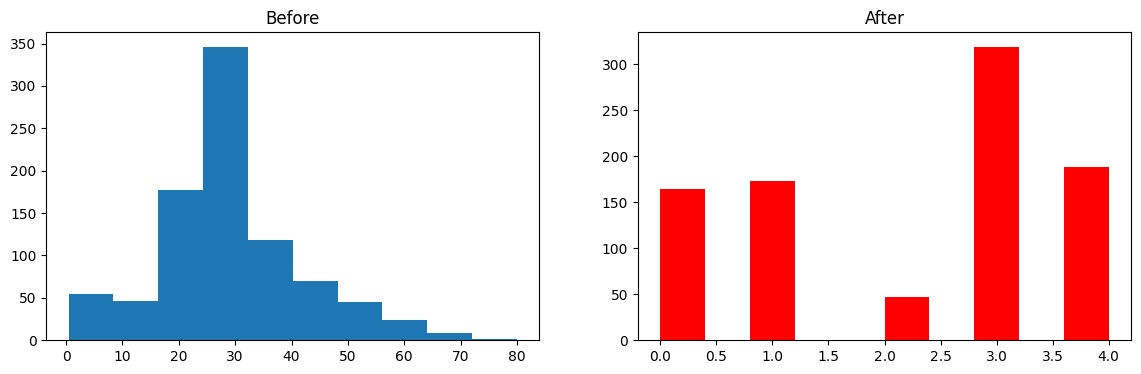

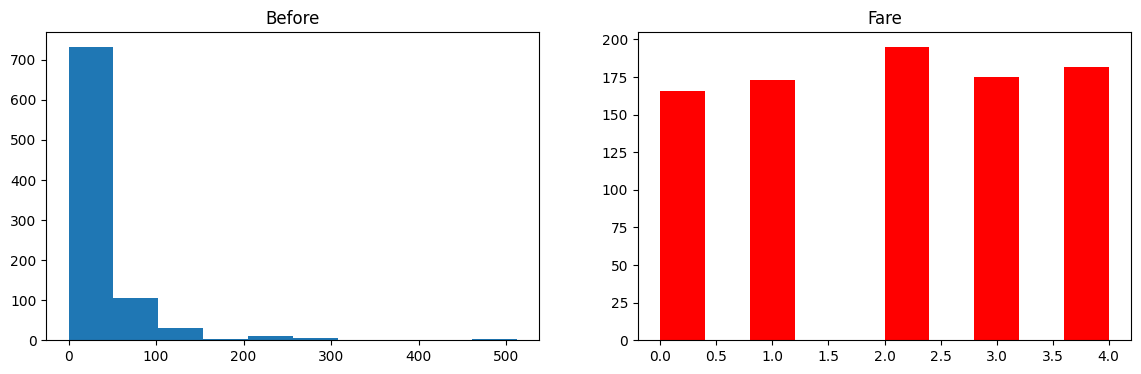

In [57]:
discretize(5, 'kmeans')